### Obtendo dados

In [43]:
import pandas as pd
import numpy as np

SHEET_PATH = 'data/apples_ts.csv'

df = pd.read_csv(SHEET_PATH)
columns_to_use = np.arange(1, len(df.columns), 1)

data = np.loadtxt(SHEET_PATH, delimiter=',', usecols=columns_to_use)

transposed_data = data.transpose()

### Separando as informações do array com slicing

In [44]:
# slicing com vírgula usado em arrays -> array[linhas, colunas]
dates = transposed_data[:,0]  

# Obtendo de forma dinânima número de colunas (feito por mim)
num_of_col = len(pd.DataFrame(transposed_data).columns)
prices = transposed_data[:,1:num_of_col]

### Visualizando os dados

##### Convertando as datas para um sequência de números que representam os meses

In [45]:
dates = np.arange(1, len(df.columns), 1)

##### Gráfico para o preço das maçãs para primeira cidade (Moscow)

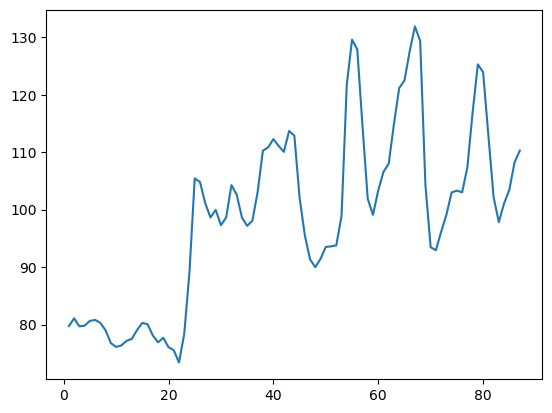

In [46]:
import matplotlib.pyplot as plt

plt.plot(
    dates,
    prices[:,0],
)

##### Separando por cidades (feito por mim utilizando list comprehension)

In [47]:
moscow, kaliningrad, petersburg, krasnodar, ekaterinburg = [city_prices for city_prices in prices.transpose()]

In [48]:
moscow_year1 = moscow[0:12]
moscow_year2 = moscow[12:24]
moscow_year3 = moscow[24:36]
moscow_year4 = moscow[36:48]

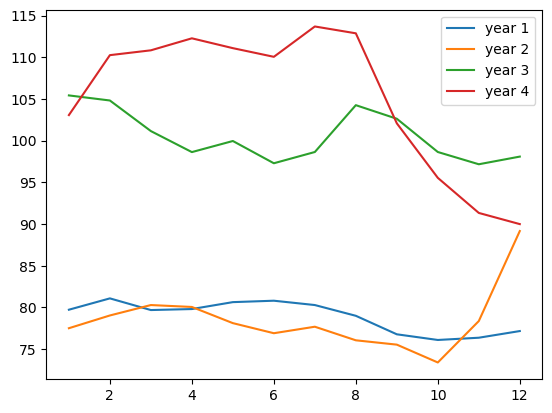

In [49]:
plt.plot(np.arange(1,13,1), moscow_year1)
plt.plot(np.arange(1,13,1), moscow_year2)
plt.plot(np.arange(1,13,1), moscow_year3)
plt.plot(np.arange(1,13,1), moscow_year4)
plt.legend(['year 1', 'year 2', 'year 3', 'year 4'])

### Comparando arrays

In [50]:
np.array_equal(moscow_year1, moscow_year2)

False

In [51]:
np.allclose(moscow_year3, moscow_year4, rtol=1)

True

### Lidando com NaNs

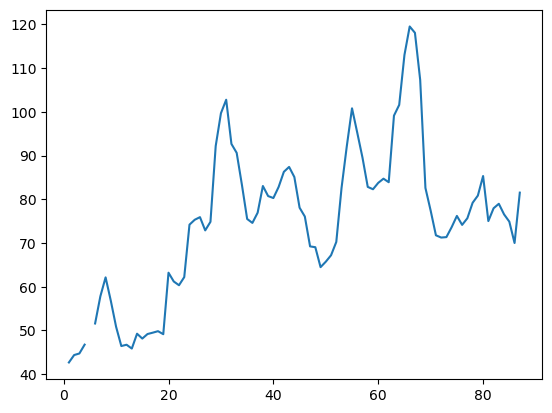

In [52]:
plt.plot(dates, kaliningrad)

##### Verificando a quantidade de NaNs

In [53]:
sum(np.isnan(kaliningrad))


1

##### Lidando com valores NaNs

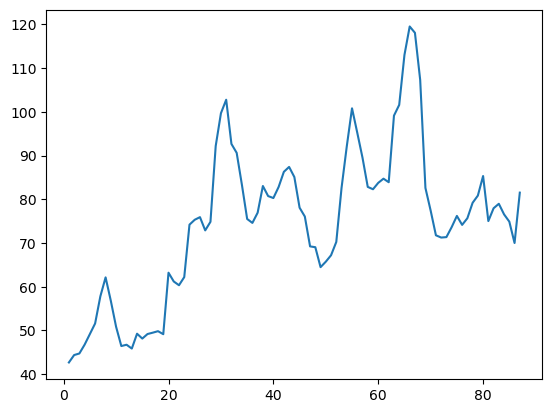

In [54]:
kaliningrad[4] = np.mean([kaliningrad[3], kaliningrad[5]])
plt.plot(dates, kaliningrad)

#### Comparando as médias de preços de duas cidades

In [55]:
np.mean(moscow)

98.79781609195402

In [56]:
np.mean(kaliningrad)

74.5506896551724